# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2018-2019 учебный год

Лектор: Илья Щуров

Семинаристы: Евгения Ческидова, Евгений Ковалев

Ассистенты: Константин Ваниев, Софья Дымченко

# Семинар 11

На этом семинаре мы:

* Познакомимся с PyTorch
* Вспомним про алгоритм обратного распространения ошибки
* Узнаем о пайплайне разработки нейросетевых моделей на пайторч
* Напишем нашу первую модель

In [1]:
%matplotlib inline

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=600>
<center>(лого здесь, ибо вы должны знать своих героев в лицо)</center>

Существует множество фреймворков для глубокого обучения, но мы рассмотрим фреймворк, который стремительно набирает популярность как среди исследователей в области глубокого обучения, так и среди простых ребят. 

Существует мнение, что регулярное использование PyTorch положительно влияет на здоровье и самочувствие.

In [28]:
%%html
<blockquote class="twitter-tweet" data-lang="en-gb"><p lang="en" dir="ltr">I&#39;ve been using PyTorch a few months now and I&#39;ve never felt better. I have more energy. My skin is clearer. My eye sight has improved.</p>&mdash; Andrej Karpathy (@karpathy) <a href="https://twitter.com/karpathy/status/868178954032513024?ref_src=twsrc%5Etfw">26 May 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


What is PyTorch?
================

<img src >

Это python-based фреймворк, преследующий 2 цели:

- Стать заменой NumPy с возможностью использования мощностей GPU
- Платформа для исследований в области глубокого обучения


Ключевые понятия
---------------

### Тензоры

Тензоры очень похожи на ndarrays в NumPy, но они могут быть загружены в память GPU и все расчеты с ними могут быть произведены на GPU



In [2]:
from __future__ import print_function
import torch

Construct a 5x3 matrix, uninitialized:

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[2.9009e+38, 4.5869e-41, 6.6380e-38],
        [0.0000e+00, 1.4013e-45, 0.0000e+00],
        [6.3651e-38, 0.0000e+00, 2.4663e-43],
        [0.0000e+00, 8.9683e-44, 0.0000e+00],
        [6.6380e-38, 0.0000e+00, 6.2191e-38]])


Construct a randomly initialized matrix:

In [6]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1242, 0.9421, 0.7569],
        [0.3775, 0.7285, 0.2585],
        [0.1603, 0.3326, 0.8372],
        [0.6955, 0.2970, 0.2170],
        [0.6723, 0.5660, 0.4801]])


Construct a matrix filled zeros and of dtype long:


In [7]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:

In [8]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user

In [9]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.0951,  1.0376,  0.6925],
        [ 0.1127, -1.2842, -0.4626],
        [-1.1416, -0.6051, -1.3088],
        [ 2.2977, -0.8336, -0.4130],
        [ 0.7442, -0.3319,  0.8346]])


Get its size:

In [10]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` на самом деле это tuple, так что он поддерживает все операции, характерные для tuple</p></div>

In [14]:
# пример такой операции
len(x.size())

2

### Операции над тензорами

####  Сложение

In [15]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.4462,  1.2460,  1.5569],
        [ 0.5812, -0.5787,  0.5305],
        [-0.7480, -0.5233, -0.9610],
        [ 2.4034, -0.2944,  0.3349],
        [ 1.0604, -0.0738,  1.4064]])


In [16]:
# альтернативный синтаксис
print(torch.add(x, y))

tensor([[ 1.4462,  1.2460,  1.5569],
        [ 0.5812, -0.5787,  0.5305],
        [-0.7480, -0.5233, -0.9610],
        [ 2.4034, -0.2944,  0.3349],
        [ 1.0604, -0.0738,  1.4064]])


providing an output tensor as argument

In [17]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.4462,  1.2460,  1.5569],
        [ 0.5812, -0.5787,  0.5305],
        [-0.7480, -0.5233, -0.9610],
        [ 2.4034, -0.2944,  0.3349],
        [ 1.0604, -0.0738,  1.4064]])


In [18]:
# adds x to y inplace
y.add_(x)
print(y)

tensor([[ 1.4462,  1.2460,  1.5569],
        [ 0.5812, -0.5787,  0.5305],
        [-0.7480, -0.5233, -0.9610],
        [ 2.4034, -0.2944,  0.3349],
        [ 1.0604, -0.0738,  1.4064]])


<div class="alert alert-info"><h4>Note</h4><p>Любая операция, изменяющая тензор in-place имеет в конце нижнее подчеркивание ``_``.
    
Примеры: ``x.copy_(y)``, ``x.t_()``, изменяют ``x``.</p></div>


#### Индексирование, слайсинг

Такое же как в NumPy

In [19]:
print(x[:, 1])

tensor([ 1.0376, -1.2842, -0.6051, -0.8336, -0.3319])


#### Resizing

In [20]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [21]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.7252])
0.7251807451248169


Более подробно обо всех операция можно почитать тут: [доки пайторчей](http://pytorch.org/docs/torch)

### Связь с NumPy

Можно конвертировать тензоры в NumPy array и обратно без особого труда (в Tensorflow для этого нужен "особый труд").


*Note: the Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.*


In [22]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [23]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


Если поменяем a, то поменяется и b, т.к. объекты делят общую память

In [24]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Создаем тензор из NumPy массива, изменяем объект NumPy массива и видим, что тензор пайторча тоже поменялся.  

In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Небольшая практическая часть

Нарисуйте функцию с помощью тензоров из пайторча

**Butterfly curve**

$$x = \sin(t) \left(e^{\cos(t)} - 2\cos(4t) - \sin^5\left({t \over 12}\right)\right)$$
$${\displaystyle y=\cos(t)\left(e^{\cos(t)}-2\cos(4t)-\sin ^{5}\left({t \over 12}\right)\right)} $$
$${\displaystyle 0\leq t\leq 12\pi } $$


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(0, 12*math.pi, steps = 10000)

# compute x(t) and y(t) as defined above
x = ###YOUR CODE
y = ###YOUR CODE

plt.plot(x.numpy(), y.numpy())

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.

(Да-да, нужно прописывать explicitly для для каждого тензора на каком же девайсе ему быть)

> - А что такое **CUDA**?
> - Это бекенд pyTorch, библиотека на C/C++, реализующая оптимальные вычисления на видеокартах фирмы Nvidia. 


In [29]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

#  Нейронные сети


### Типичный пайплайн разработки нейросетевой модели


- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  
- Задаем архитектуру сети
- Итерируемся по датасету входных данных
- Каждый кусок датасета (батч) прогоняем через архитектуру **[forward pass]**
- Считаем значение функции потерь (насколько предсказание сети отличается от правильного ответа) **[forward pass]**
- Считаем градиенты функции потерь по параметрам сети с помощью алгоритма обратного распространения ошибки (backpropagation) **[backward pass]**
- Обновляем веса сети по простому правилу (или его вариациаями):
  ``weight = weight - learning_rate * gradient``
  
#### Backpropagation

Чтобы лучше понять backprop можно почитать [тут](http://cs231n.github.io/optimization-2/)



* На картинке зеленым цветом представлены значения в узлах вычислительного графа при прямом проходе
* Красным цветом обозначены подсчитанные на обратном проходе градиенты

<img src="https://i.stack.imgur.com/zP6uK.png" width=500>

В виде кода это выглядит следующим образом:

In [30]:
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 1.0 * dfdq # dq/dx = 1. And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1

* Никто бы не пользовался фреймворками для обучения нейронных сетей, если бы в них не было возможности автоматического дифференцирования!

* `torch.autograd` позволяет делать **backward pass** без участия разработчика!

* В тензорах pyTorch на самом деле хранятся градиенты по этим тензорам

* Специально для работы с нейросетями у торча припасен модуль `torch.nn`.


In [40]:
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

##### Подготовка данных

Используются пайплайны подготовки данных из PyTorch (не обязательно в это вникать на текущем этапе)

In [41]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='.', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

In [42]:
test_dataset = dsets.MNIST(root='.', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [62]:
print("* Размер train\n [количество_примеров, высота_картинки, ширина_картинки]: ", train_dataset.train_data.shape)
print("* Размер test\n [количество_примеров, высота_картинки, ширина_картинки]: ", test_dataset.test_data.shape)
print("---")
print("Метки классов в датасете: ", train_dataset.train_labels.unique())

* Размер train
 [количество_примеров, высота_картинки, ширина_картинки]:  torch.Size([60000, 28, 28])
* Размер test
 [количество_примеров, высота_картинки, ширина_картинки]:  torch.Size([10000, 28, 28])
---
Метки классов в датасете:  tensor([8, 7, 6, 3, 2, 9, 1, 4, 0, 5])


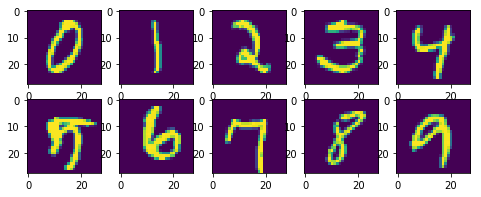

In [78]:
fig=plt.figure(figsize=(8, 3))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    idx = np.random.choice(np.arange(60000)[train_dataset.train_labels.numpy()==i-1])
    img = train_dataset.train_data[idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

##### Разработка модели на примере логистической регрессии

**Правила торча для nn**

* Необходимо всегда писать класс для каждой модели
* Этот класс всегда необходимо наследовать от модуля nn.Module
    - в этом случае backward pass прописан за вас и нужно написать только forward
* В `__init__` создаем слои и функции, которыми будем пользоваться в forward & backward стадиях
* В `forward` прописываем непосредственную архитектуру сети (как слои связаны друг с другом)


**Полносвязный слой**

Сегодня мы используем только полносвязный или линейный слой `nn.Linear`.

Линейный слой имеет 2 параметра `in_features`, `out_features`, что напрямую соответствует размерностям матрицы `W` в формуле:
$$\Large \underset{[batch\_size \times out\_features]}{x\_out} = \underset{[batch\_size \times in\_features]}{x\_in} \cdot \underset{[in\_features \times out\_features]}{W}$$

In [137]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        # всегда вызываем super метод в таком формате,
        # если init метод хотим прописать в классе
        super(LogisticRegression, self).__init__()
        
        # в методе __init__ мы создаем объекты (слои и операции),
        # которыми желаем пользоваться в forward & backward стадиях
        # здесь мы создаем и сохраняем ссылку на объект линейного слоя
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        # здесь мы применяем линейный слой к входным данным и возращаем результат
        logits = self.linear(x)
        return logits

In [138]:
# Задаем гиперпараметры
input_size = 784 # 28*28 -- мы вытянули в линию все пиксели картинки
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [139]:
# Создаем объект модели с этими параметрами
model = LogisticRegression(input_size=input_size, num_classes=num_classes)

In [140]:
# проверим на рандомных данных forward pass
rnd_x = np.random.rand(1, input_size)
out = model.forward(torch.from_numpy(rnd_x).float())
print(out.size())
print(out)

torch.Size([1, 10])
tensor([[ 0.0060, -0.1428, -0.3754,  0.3453, -0.7917,  0.1498,  0.4992, -0.3609,
          0.3930, -0.1997]], grad_fn=<ThAddmmBackward>)


Можно посмотреть на размер матрицы W для линейного слоя модели.

Здесь видно 10 - количество классов.
Выходит, что для каждого класса хранятся свои 784 параметра!

In [141]:
model.linear.parameters().__next__().size()

torch.Size([10, 784])

### Функция потерь и обучение

In [142]:
# Какие параметры обучаем?

In [143]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0291, -0.0086,  0.0256,  ...,  0.0325,  0.0059, -0.0201],
        [ 0.0158,  0.0195, -0.0197,  ..., -0.0082, -0.0125,  0.0002],
        [ 0.0139, -0.0063, -0.0070,  ...,  0.0188,  0.0136, -0.0348],
        ...,
        [ 0.0208, -0.0354, -0.0193,  ...,  0.0160, -0.0151,  0.0076],
        [ 0.0009,  0.0243, -0.0193,  ...,  0.0109,  0.0083, -0.0028],
        [ 0.0321, -0.0199,  0.0071,  ...,  0.0125, -0.0344,  0.0080]],
       requires_grad=True)
Parameter containing:
tensor([-0.0028, -0.0210,  0.0139,  0.0211, -0.0253,  0.0092, -0.0189,  0.0006,
        -0.0070, -0.0208], requires_grad=True)


Получили как раз параметры $W$ & $b$, которые и обучаются в лог регрессии

Объявляем функцию потерь -- **софтмакс от входных данных этой функции считается у нее внутри**, поэтому в нашей модели не было слоя с софтмаксом, хотя он и должен был бы быть.

In [144]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [145]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # разворачиваем картинку в строчку пикселей
        images = images.view(-1, 28*28)
        
        # можно сделать model(input) или model.forward(input) -- это одно и то же
        # таким образом делаем прямой проход
        outputs = model(images)
        
        # считаем функцию потерь
        loss = criterion(outputs, labels)
        
        # зануляем градиенты оптимайзера,
        # т.к каждый шаг он добавляет значение градиентов
        # к текущему состоянию градиентов каждой переменной
        optimizer.zero_grad()
        
        # пробрасываем градиенты для всех переменных
        # в вычислительном графе
        loss.backward()
        
        # обновляем значения параметров модели
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

/home/fogside/virtens/py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: [1/5], Step: [100/600], Loss: 2.1518
Epoch: [1/5], Step: [200/600], Loss: 2.0988
Epoch: [1/5], Step: [300/600], Loss: 1.9788
Epoch: [1/5], Step: [400/600], Loss: 1.9488
Epoch: [1/5], Step: [500/600], Loss: 1.8296
Epoch: [1/5], Step: [600/600], Loss: 1.8068
Epoch: [2/5], Step: [100/600], Loss: 1.7799
Epoch: [2/5], Step: [200/600], Loss: 1.6390
Epoch: [2/5], Step: [300/600], Loss: 1.5645
Epoch: [2/5], Step: [400/600], Loss: 1.5497
Epoch: [2/5], Step: [500/600], Loss: 1.5047
Epoch: [2/5], Step: [600/600], Loss: 1.5018
Epoch: [3/5], Step: [100/600], Loss: 1.5466
Epoch: [3/5], Step: [200/600], Loss: 1.4266
Epoch: [3/5], Step: [300/600], Loss: 1.2647
Epoch: [3/5], Step: [400/600], Loss: 1.2457
Epoch: [3/5], Step: [500/600], Loss: 1.2366
Epoch: [3/5], Step: [600/600], Loss: 1.2782
Epoch: [4/5], Step: [100/600], Loss: 1.1716
Epoch: [4/5], Step: [200/600], Loss: 1.1291
Epoch: [4/5], Step: [300/600], Loss: 1.1473
Epoch: [4/5], Step: [400/600], Loss: 1.1594
Epoch: [4/5], Step: [500/600], L

## Визуализация весов

Теперь давайте провизуализируем веса модели, чтобы понять какие "фичи" модель выделила для каждого класса

In [151]:
W = model.parameters().__next__().detach().numpy()
W.shape

(10, 784)

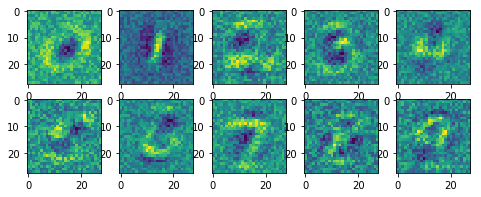

In [155]:
fig=plt.figure(figsize=(8, 3))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = W[i-1].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Как вы думаете, почему так вышло, что веса модели оказались так похожи на сами картинки?

## Задания

1. Посчитайте метрику (roc_auc) для предсказаний модели на отложенной выборке (test_dataset)

2. Напишите модель Логистической регрессии без использования слоев из PyTorch, а используя только перемножения тензоров.

3. Добавьте линейных слоев в модель. Изменится ли качество классификации?

4. Как вы думаете, имеет ли смысл добавлять друг за другом несколько линейных слоев?

5. Что можно сделать, чтобы добавление нескольких линейных слоев в модель имело бы смысл?